# Dog Breed Identification : utilisation des modèles

Cette feuille montre l'historique généré par chaque modèle de l'évolution de la fonction de coût et l'accuracy en fonction de nombre d'epochs.   
Puis nous allons générer des fichiers csv des predictions de chaque modèle sur le jeu de données test de Kaggle.

In [31]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import os
import re
from PIL import Image
from random import shuffle
import pickle

## Historiques des modèles

### Fonctions pour tracer les graphiques

In [2]:
def plot_acc(plt,history,title):
    try:
        plt.plot(history['acc'])
        plt.plot(history['val_acc'])
        plt.set_title(title+'model accuracy')
        plt.set(xlabel='Epoch', ylabel='Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
    except:
        plt.plot(history['accuracy'])
        plt.plot(history['val_accuracy'])
        plt.set_title(title+'model accuracy')
        plt.set(xlabel='Epoch', ylabel='Accuracy')
        plt.legend(['Train', 'Validation'], loc='upper left')
    
    
def plot_loss(plt,history,title):
    # Plot training & validation loss values
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.set_title(title+'model loss')
    plt.set(xlabel='Epoch', ylabel='Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    

### Graphiques d'accuracy

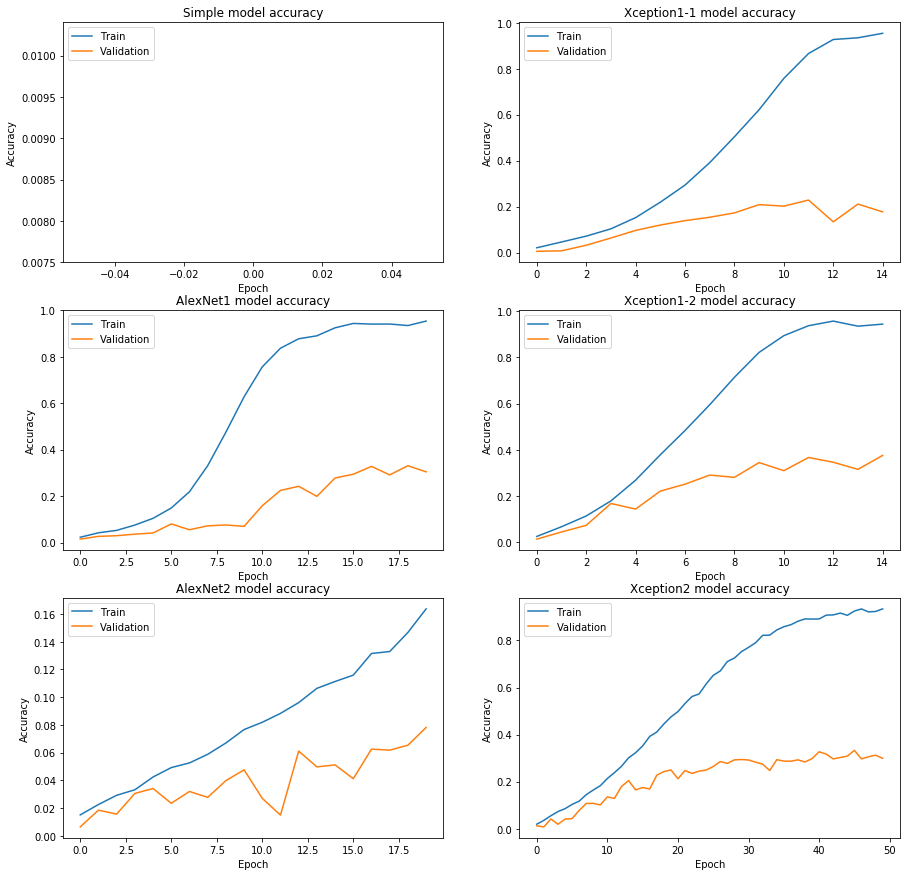

In [3]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))

histories = [pickle.load(open('models/Simple/modelSimpleHistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception1-1HistoryDict',"rb")),
             pickle.load(open('models/AlexNet/modelAlexNet1HistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception1-2HistoryDict',"rb")),
             pickle.load(open('models/AlexNet/modelAlexNet2HistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception2HistoryDict',"rb"))]
plot_acc(axs[0,0],histories[0],'Simple ')
plot_acc(axs[0,1],histories[1],'Xception1-1 ')
plot_acc(axs[1,0],histories[2],'AlexNet1 ')
plot_acc(axs[1,1],histories[3],'Xception1-2 ')
plot_acc(axs[2,0],histories[4],'AlexNet2 ')
plot_acc(axs[2,1],histories[5],'Xception2 ')

### Graphiques de fonction coût

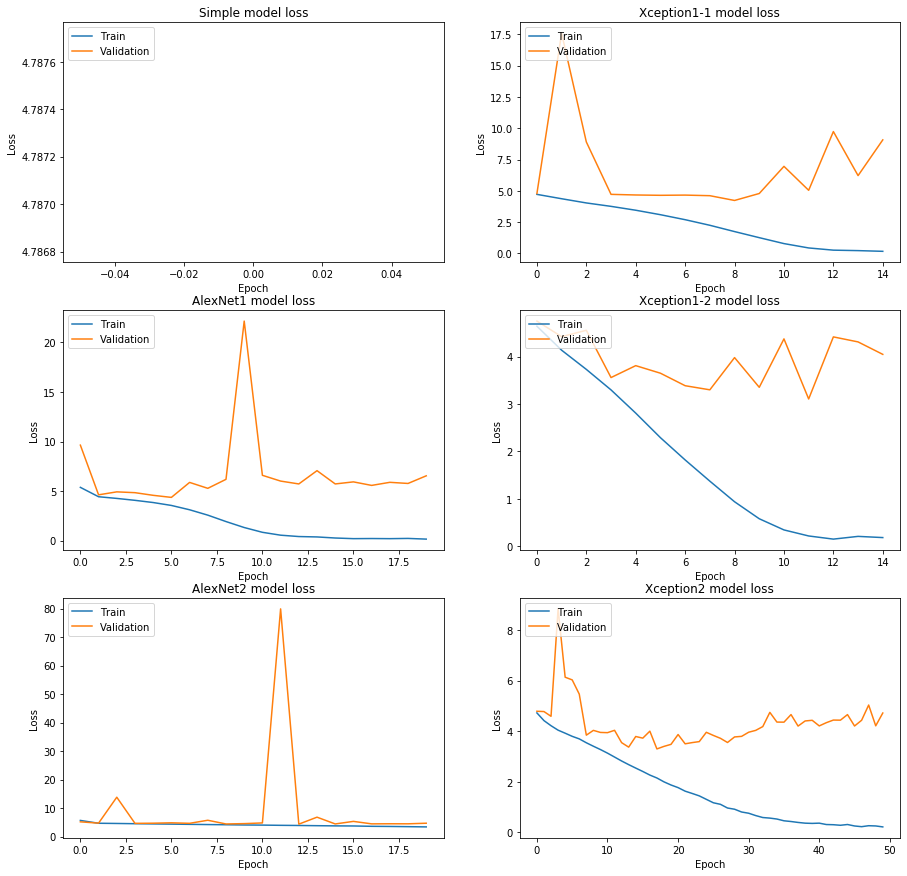

In [4]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))

histories = [pickle.load(open('models/Simple/modelSimpleHistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception1-1HistoryDict',"rb")),
             pickle.load(open('models/AlexNet/modelAlexNet1HistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception1-2HistoryDict',"rb")),
             pickle.load(open('models/AlexNet/modelAlexNet2HistoryDict',"rb")),
             pickle.load(open('models/Xception/modelXception2HistoryDict',"rb"))]
plot_loss(axs[0,0],histories[0],'Simple ')
plot_loss(axs[0,1],histories[1],'Xception1-1 ')
plot_loss(axs[1,0],histories[2],'AlexNet1 ')
plot_loss(axs[1,1],histories[3],'Xception1-2 ')
plot_loss(axs[2,0],histories[4],'AlexNet2 ')
plot_loss(axs[2,1],histories[5],'Xception2 ')

D'après les deux figures ci-dessus, nous pouvons juger que les 2 meilleurs modèles parmi les 6 sont : Xception1-2 et Xception2.   
Prédisons les modalités du jeu de données test de Kaggle en utilisant ces deux modèles.   

## Prédictions (Données test Kaggle)

In [33]:
def del_ext(fn):
  return re.split(r'[/.]', fn)[-2]

In [8]:
zip_ref = zipfile.ZipFile("dog-breed-identification.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

### Xception1-2

### Récupération des données

In [9]:
PATH = '/tmp/'
IMG_SIZE = 299
test_dir = os.path.join(PATH, 'test')


test_data = []
for img in os.listdir(test_dir):
    path = os.path.join(test_dir, img)
    img = Image.open(path)
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    test_data.append([path,np.array(img)])

x_test = np.array([i[1] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE,3)
id_test = np.array([i[0] for i in test_data])

### Récupération du modèle et prédiction

Récupération du modèle :

In [15]:
modelXception1_2 = load_model('models/Xception/modelXception1-2.h5')

Récupération de l'objet `LabelEncoder` utilisé pour l'entraînement :

In [34]:
le = LabelEncoder()
le.classes_ = np.load('classes_le.npy',allow_pickle=True)
le.classes_

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

Prédiction :

In [16]:
y_test = modelXception1_2.predict(x_test)

In [36]:
df_submit = pd.DataFrame(y_test,
                         columns = le.classes_)
df_submit.insert(0, "id", id_test)
df_submit["id"] = df_submit["id"].apply(del_ext)
df_submit.head(5)

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.642017e-11  2.396010e-02   
1  00102ee9d8eb90812350685311fe5890   4.007316e-07  1.512509e-09   
2  0012a730dfa437f5f3613fb75efcd4ce   1.357988e-11  9.905605e-01   
3  001510bc8570bbeee98c8d80c8a95ec1   6.388369e-06  4.780314e-02   
4  001a5f3114548acdefa3d4da05474c2e   4.289237e-08  8.350892e-01   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         1.912221e-10  1.053647e-13                    8.802454e-15   
1         8.419752e-12  7.862132e-14                    4.697407e-10   
2         8.251330e-13  1.238468e-05                    1.214405e-09   
3         8.929843e-08  4.159017e-08                    1.603778e-07   
4         6.932813e-10  4.473987e-05                    8.124464e-08   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.134489e-13        6.443821e-12  3.962228e-20  8.495332e-13  ...   
1  4.086598e-11        5.323470e-10  3.292438e-13  1.492570e-14  ...   
2  4.590808e-12        3.600555e-09  6.304302e-13  4.560220e-08  ...   
3  1.469231e-10        3.065386e-08  3.313090e-11  3.232790e-10  ...   
4  2.257574e-14        5.914917e-09  1.015346e-15  3.703417e-09  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.102282e-12  1.455935e-14  1.126224e-16  4.181434e-10  5.430589e-16   
1  6.292247e-05  8.352611e-10  6.530399e-16  9.135885e-14  1.214893e-15   
2  4.548122e-11  4.287439e-11  3.816564e-15  7.885883e-07  3.823591e-10   
3  1.524378e-08  1.309358e-11  7.832584e-10  4.929005e-13  2.159251e-11   
4  1.349946e-08  4.233203e-17  9.517308e-11  3.641158e-12  3.567989e-08   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            3.246853e-10                 3.922713e-16  3.834019e-14   
1            5.637378e-12                 2.106405e-05  1.103830e-10   
2            4.983425e-07                 6.193543e-09  3.496242e-08   
3            6.509235e-11                 1.562041e-10  5.416012e-10   
4            1.320560e-08                 3.839559e-10  1.297353e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             7.927096e-15       7.137419e-09  
1             1.081725e-06       5.522198e-08  
2             3.028030e-03       2.591286e-07  
3             1.079311e-09       4.116413e-06  
4             4.006390e-08       1.040710e-07  

[5 rows x 121 columns]

### Xcetpion2

### Récupération des données

In [55]:
PATH = '/tmp/'
IMG_SIZE = 128
test_dir = os.path.join(PATH, 'test')
image_generator = ImageDataGenerator(rescale=1./255)

test_data = []
for img in os.listdir(test_dir):
    path = os.path.join(test_dir, img)
    img = Image.open(path)
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
    test_data.append([path,np.array(img)])

x_test = np.array([i[1] for i in test_data]).reshape(-1, IMG_SIZE, IMG_SIZE,3)
id_test = np.array([i[0] for i in test_data])

test_data = image_generator.flow(x_test, batch_size=1, shuffle=False)

### Récupération du modèle et prédiction

Récupération du modèle :

In [37]:
modelXception2 = load_model('models/Xception/modelXception2.h5')

Prédiction :

In [56]:
y_test2 = modelXception2.predict_generator(test_data,verbose=1)

10357/10357 [==============================] - 157s 15ms/step


In [59]:
df_submit2 = pd.DataFrame(y_test2,
                         columns = le.classes_)
df_submit2.insert(0, "id", id_test)
df_submit2["id"] = df_submit2["id"].apply(del_ext)
df_submit2.head(5)

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   1.987369e-14  1.349395e-04   
1  00102ee9d8eb90812350685311fe5890   1.832901e-06  3.899569e-11   
2  0012a730dfa437f5f3613fb75efcd4ce   2.148067e-08  6.262760e-09   
3  001510bc8570bbeee98c8d80c8a95ec1   9.048651e-06  7.462650e-06   
4  001a5f3114548acdefa3d4da05474c2e   8.552602e-05  8.664441e-02   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         6.833517e-13  4.203092e-13                    6.364299e-11   
1         2.167243e-19  5.576415e-13                    1.142614e-09   
2         1.099340e-10  6.934363e-08                    3.980784e-09   
3         1.156136e-06  4.244270e-08                    1.522290e-05   
4         4.260881e-09  5.483764e-05                    5.922558e-05   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  7.823385e-11        1.464953e-10  9.945268e-17  1.956783e-12  ...   
1  4.201158e-13        4.710335e-13  8.769175e-15  4.515666e-14  ...   
2  5.341393e-10        2.842770e-08  4.428973e-10  1.183596e-09  ...   
3  4.287853e-07        9.202784e-10  1.219320e-07  2.769282e-06  ...   
4  2.566599e-08        2.101844e-09  2.730461e-17  1.995084e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  2.772920e-11  1.479992e-10  1.152878e-11  2.687810e-12  1.150250e-13   
1  4.059582e-12  3.041223e-08  3.142662e-11  1.206526e-07  2.386953e-14   
2  1.077058e-09  1.334857e-08  4.168413e-13  8.374887e-06  3.484272e-07   
3  3.218061e-05  1.538325e-06  1.391552e-07  1.051513e-05  3.193853e-06   
4  2.373949e-10  3.510806e-13  2.661758e-12  6.741941e-09  6.844097e-05   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.701215e-11                 3.989911e-13  4.428430e-10   
1            1.126169e-14                 9.967402e-10  2.151641e-11   
2            1.796990e-08                 4.990508e-09  2.751309e-07   
3            1.105696e-07                 2.854233e-08  1.136524e-05   
4            1.193246e-10                 3.840816e-11  7.577133e-09   

   wire-haired_fox_terrier  yorkshire_terrier  
0             3.905292e-08       1.087397e-09  
1             2.135587e-09       1.750801e-14  
2             1.049429e-06       3.243955e-10  
3             1.964556e-08       4.755840e-07  
4             1.169906e-05       7.715450e-08  

[5 rows x 121 columns]

## Submit Kaggle

In [58]:
df_submit.to_csv("submits/df_submit.csv",index=False)
df_submit2.to_csv("submits/df_submit2.csv",index=False)

En submittant ces deux resultats sur Kaggle, on obtient respectivement les scores suivants: 

<img src="submits/df_submit.png">      
<img src="submits/df_submit2.png">

## Conclusion

Les modèles créés au sein de ce projet ont un score au dessous du score de modèle native (La même probabilité par tout).    
Pour créer un modèle plus précis, nous pouvons utiliser d'autres bibliothèques au lieu de keras comme fast.ai.   
La limite en recource aussi est en cause de la faiblesse de ces modèles.    
Finalement, nous pouvons utiliser des algorithmes évolutionnaires pour chercher les hyper-paramètres optimaux. Cela a aussi besoin des resources GPUs performants.